## Deliverables:

Import your data into a Pandas DataFrame.

Merge your DataFrames.

Create a bubble chart that showcases the average fare versus the total number 
of rides with bubble size based on the total number of drivers for each city type, including urban, suburban, and rural.

### Determine the mean, median, and mode for the following:

The total number of rides for each city type.

The average fares for each city type.

The total number of drivers for each city type.

### Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:

The number of rides for each city type.

The fares for each city type.

The number of drivers for each city type.

### Create a pie chart that visualizes each of the following data for each city type:

The percent of total fares.

The percent of total rides.

The percent of total drivers.

In [2]:
# Add the Matplotlib inline magic command

%matplotlib inline

# Dependecies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Files to load

city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"


In [4]:
# Read the city data file and store it in a pandas DataFrame

city_data_df = pd.read_csv(city_data_to_load)

city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
# Read the ride data file and store it in a pandas DataFrame

ride_data_df = pd.read_csv(ride_data_to_load)

ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [6]:
# Get the columns and the rows that are not null (city data)

print(f'{city_data_df.count()}\n')

# Get the columns and the rows that are not null 

print(f'{city_data_df.isnull().sum()}\n')

# Get the data types of each column

print(f'{city_data_df.dtypes}\n')

# Get the unique values of the type of city

print(f'{city_data_df["type"].unique()}\n')

# Get the number of data points from the urban cities

urban_count = sum(city_data_df["type"]=='Urban')

suburban_count = sum(city_data_df["type"]=='Suburban')

rural_count = sum(city_data_df["type"]=='Rural')

print(f' Urban: {urban_count}, Suburban: {suburban_count}, Rural: {rural_count}')

city            120
driver_count    120
type            120
dtype: int64

city            0
driver_count    0
type            0
dtype: int64

city            object
driver_count     int64
type            object
dtype: object

['Urban' 'Suburban' 'Rural']

 Urban: 66, Suburban: 36, Rural: 18


In [7]:
# Get the columns and the rows that are not null (ride data)

print(f'{ride_data_df.count()}\n')

# Get the columns and the rows that are not null 

print(f'{ride_data_df.isnull().sum()}\n')

# Get the data types of each column

print(f'{ride_data_df.dtypes}\n')


city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

city       0
date       0
fare       0
ride_id    0
dtype: int64

city        object
date        object
fare       float64
ride_id      int64
dtype: object



### Merge DataFrames

In [8]:
# combine the data into a single dataset

pyber_data_df = pd.merge(ride_data_df, city_data_df, how = "left", on = ['city', 'city'])

# Display the DataFrame

pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create a bubble chart for the data:

Need to create 3 series for each city type dataframe:

1. count of rides
2. avg fare
3. avg drivers

In [9]:
# Create the urban, suburban, and rural city DataFrames

urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']

suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']

rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']


In [10]:
# Get the number of rides for urban cities

urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [11]:
# Get the suburban and rural ride counts

suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']

rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [12]:
# Get the average Fare ($) for urban cities

urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [13]:
# Get the avg fare for suburban and rural cities

suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']

rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [14]:
# Get the avg driver count for urban cities

urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [15]:
# get the avg driver count for suburban and rural cities

suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']

rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']


### Create 3 bubble charts; one for each city type:

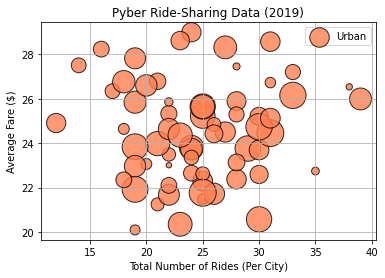

In [16]:
# Build the scatter plots for urban cities.

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=(10*urban_driver_count), c='coral',
            edgecolor='black', linewidths = 1,
            alpha=0.8, label="Urban")
plt.legend()
plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)


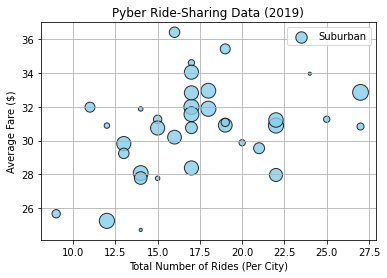

In [17]:
# Build the scatter plots for suburban cities

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=(10*suburban_driver_count), c='skyblue',
           edgecolor = 'black', linewidths=1,
           alpha=0.8, label='Suburban')
plt.legend()
plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)


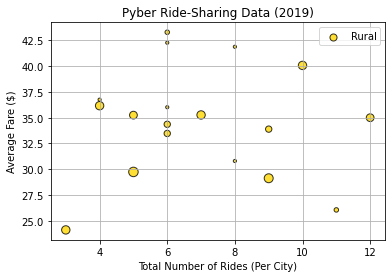

In [18]:
# Build the scatter plots for rural cities

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Rural")

plt.legend()
plt.title('Pyber Ride-Sharing Data (2019)')
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)

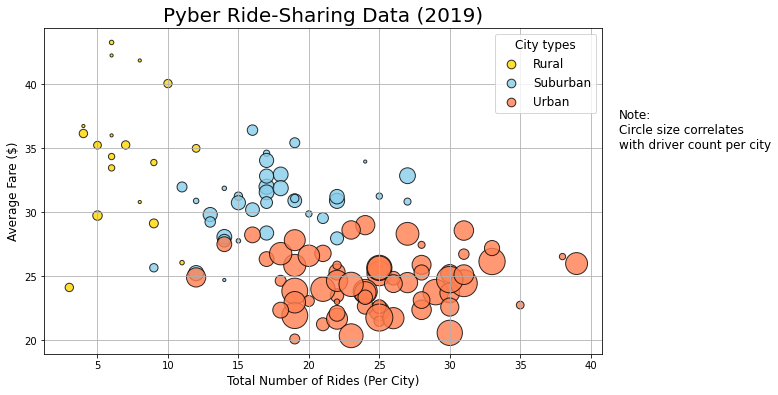

In [22]:
# Add the scatter charts for each type of city.

plt.subplots(figsize=(10,6))

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c='gold',
           edgecolor='black', linewidths=1,
           alpha=0.8, label="Rural")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=(10*suburban_driver_count), c='skyblue',
           edgecolor = 'black', linewidths=1,
           alpha=0.8, label='Suburban')

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=(10*urban_driver_count), c='coral',
            edgecolor='black', linewidths = 1,
            alpha=0.8, label="Urban")

# Incorporate the other graph properties

plt.title('Pyber Ride-Sharing Data (2019)', fontsize=20)
plt.xlabel('Total Number of Rides (Per City)', fontsize = 12)
plt.ylabel('Average Fare ($)', fontsize=12)
plt.grid(True)

# Add the legend - and format it to what we need

lgnd = plt.legend(fontsize='12', mode='Expanded',
                 scatterpoints=1, loc='best', title='City types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.

plt.text(42, 35, 'Note:\nCircle size correlates\nwith driver count per city', fontsize= 12)

# Save the Figure

plt.savefig("analysis/Fig1.png", bbox_inches='tight')

# show the plot

plt.show()


## Adding Descriptive Statistics

### 3 Methods:

1. Pandas describe() function
2. Pandas mean(), mode(), median()
3. NumPy mean(), median() and SciPy mode()


In [ ]:
# Get summary statistics: pandas describe()

In [33]:
# Get summary satistics for city dataframes

# urban dataframe:

print(f'Urban: \n{urban_cities_df.describe()}\n')

# rural dataframe:

print(f'Rural: \n{rural_cities_df.describe()}\n')

# suburban dataframe:

print(f'Suburban: \n{suburban_cities_df.describe()}')


Urban: 
              fare       ride_id  driver_count
count  1625.000000  1.625000e+03   1625.000000
mean     24.525772  4.873485e+12     36.678154
std      11.738649  2.907440e+12     20.075545
min       4.050000  1.458810e+10      3.000000
25%      14.550000  2.400244e+12     22.000000
50%      24.640000  4.711188e+12     37.000000
75%      34.580000  7.451579e+12     52.000000
max      44.970000  9.991538e+12     73.000000

Rural: 
             fare       ride_id  driver_count
count  125.000000  1.250000e+02    125.000000
mean    34.623440  4.647746e+12      4.296000
std     14.558046  2.887834e+12      2.691156
min     10.110000  2.684873e+10      1.000000
25%     19.900000  2.275364e+12      1.000000
50%     37.050000  4.023962e+12      4.000000
75%     47.070000  7.118047e+12      7.000000
max     58.550000  9.990581e+12      9.000000

Suburban: 
             fare       ride_id  driver_count
count  625.000000  6.250000e+02    625.000000
mean    30.970128  4.971015e+12     13.712

In [31]:
# Get descriptive statistics for ride count for each city type

# urban city ride count

print(f'Urban: \n{urban_ride_count.describe()}\n')

# rural city ride count

print(f'Rural: \n{rural_ride_count.describe()}\n')

# subruban city ride ride count

print(f'Surburban: \n{suburban_ride_count.describe()}\n')

Urban: 
count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

Rural: 
count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

Surburban: 
count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64



In [34]:
# Get summary statistics: - Pandas mean(), median(), mode() Method

In [36]:
# Calculate the mean of the ride count for each city type

round(urban_ride_count.mean(),2),  round(rural_ride_count.mean(),2), round(suburban_ride_count.mean(),2)

(24.62, 6.94, 17.36)

In [37]:
# Calculate the median of the ride count for each city type

round(urban_ride_count.median(),2),  round(rural_ride_count.median(),2), round(suburban_ride_count.median(),2)

(24.0, 6.0, 17.0)

In [40]:
# Calculate the median of the ride count for each city type

print(f'Urban: \n{urban_ride_count.mode()} \n\nRural: \n{rural_ride_count.mode()} \n\nSuburban: \n{suburban_ride_count.mode()}')

Urban: 
0    22
1    25
dtype: int64 

Rural: 
0    6
dtype: int64 

Suburban: 
0    17
dtype: int64


In [41]:
# Get summary statistics: - NumPy mean(), median(), and SciPy mode() Method

In [42]:
# Import NumPy and the stats module from SciPy.

import numpy as np
import scipy.stats as sts

In [44]:
# Calculate the measures of central tendency for the ride count for the urban city

mean_urban_ride_count = np.mean(urban_ride_count)
print(f'Urban ride mean:\n{mean_urban_ride_count}\n')

median_urban_ride_count = np.median(urban_ride_count)
print(f'Urban ride median: \n{median_urban_ride_count}\n')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'Urban ride mode: \n{mode_urban_ride_count}')

Urban mean:
24.62121212121212

Urban median: 
24.0

Urban mode: 
ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [45]:
# Calculate the measures of central tendency for the ride count for the rural city

mean_rural_ride_count = np.mean(rural_ride_count)
print(f'Rural ride mean:\n{mean_rural_ride_count}\n')

median_rural_ride_count = np.median(rural_ride_count)
print(f'Rural ride median: \n{median_rural_ride_count}\n')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'Rural ride mode: \n{mode_rural_ride_count}')

Rural mean:
6.944444444444445

Rural median: 
6.0

Rural mode: 
ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [50]:
# Calculate the measures of central tendency for the ride count for the suburban city

mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'Suburban ride mean:\n{mean_suburban_ride_count}\n')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'Suburban ride median: \n{median_suburban_ride_count}\n')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'Suburban ride mode: \n{mode_suburban_ride_count}')

Suburban mean:
17.36111111111111

Suburban median: 
17.0

Suburban mode: 
ModeResult(mode=array([17], dtype=int64), count=array([7]))


### Summary Statistics for the fare by city type:

In [49]:
# Create a series of the fares for each city from the city dataframe

urban_fares = urban_cities_df['fare']

suburban_fares = suburban_cities_df['fare']

rural_fares = rural_cities_df['fare']


In [53]:
# Get descriptive statistics of the fare for urban cities

mean_urban_fares = np.mean(urban_fares)
print(f'Urban fare mean:\n${mean_urban_fares:.2f}\n')

median_urban_ride_count = np.median(urban_ride_count)
print(f'Urban fare median: \n${median_urban_ride_count:.2f}\n')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'Urban fare mode: \n{mode_urban_ride_count}')

Urban fare mean:
$24.53

Urban fare median: 
$24.00

Urban fare mode: 
ModeResult(mode=array([22], dtype=int64), count=array([7]))


In [54]:
# Get descriptive statistics of the fare for rural cities

mean_rural_fares = np.mean(rural_fares)
print(f'Rural fare mean:\n${mean_rural_fares:.2f}\n')

median_rural_ride_count = np.median(rural_ride_count)
print(f'Rural fare median: \n${median_rural_ride_count:.2f}\n')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'Rural fare mode: \n{mode_rural_ride_count}')

Rural fare mean:
$34.62

Rural fare median: 
$6.00

Rural fare mode: 
ModeResult(mode=array([6], dtype=int64), count=array([5]))


In [55]:
# Get descriptive statistics of the fare for urban cities

mean_suburban_fares = np.mean(suburban_fares)
print(f'Suburban fare mean:\n${mean_suburban_fares:.2f}\n')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'Suburban fare median: \n${median_suburban_ride_count:.2f}\n')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'Suburban fare mode: \n{mode_suburban_ride_count}')

Suburban fare mean:
$30.97

Suburban fare median: 
$17.00

Suburban fare mode: 
ModeResult(mode=array([17], dtype=int64), count=array([7]))


### Summary statistics for the number of drivers by city type:

In [56]:
# Get the diriver count data from the urban cities.

urban_drivers = urban_cities_df['driver_count']

rural_drivers = rural_cities_df['driver_count']

suburban_drivers = suburban_cities_df['driver_count']

In [57]:
# Get the desciriptive statistics of the number of drivers in urban cities

mean_urban_drivers = np.mean(urban_drivers)
print(f'Urban driver mean:\n{mean_urban_drivers:.2f}\n')

median_urban_drivers = np.median(urban_drivers)
print(f'Urban driver median:\n{median_urban_drivers}\n')

mode_urban_drivers = sts.mode(urban_drivers)
print(f'Urban driver mean:\n{mode_urban_drivers}')

Urban driver mean:
36.68

Urban driver median:
37.0

Urban driver mean:
ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [58]:
# Get the desciriptive statistics of the number of drivers in rural cities

mean_rural_drivers = np.mean(rural_drivers)
print(f'Rural driver mean:\n{mean_rural_drivers:.2f}\n')

median_rural_drivers = np.median(rural_drivers)
print(f'Rural driver median:\n{median_rural_drivers}\n')

mode_rural_drivers = sts.mode(rural_drivers)
print(f'Rural driver mean:\n{mode_rural_drivers}')

Rural driver mean:
4.30

Rural driver median:
4.0

Rural driver mean:
ModeResult(mode=array([1], dtype=int64), count=array([32]))


In [59]:
# Get the desciriptive statistics of the number of drivers in suburban cities

mean_suburban_drivers = np.mean(suburban_drivers)
print(f'Suburban driver mean:\n{mean_suburban_drivers:.2f}\n')

median_suburban_drivers = np.median(suburban_drivers)
print(f'Suburban driver median:\n{median_suburban_drivers}\n')

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f'Suburban driver mean:\n{mode_suburban_drivers}')

Suburban driver mean:
13.71

Suburban driver median:
16.0

Suburban driver mean:
ModeResult(mode=array([20], dtype=int64), count=array([79]))


## Box and Whisker Plots for Ride Count Data

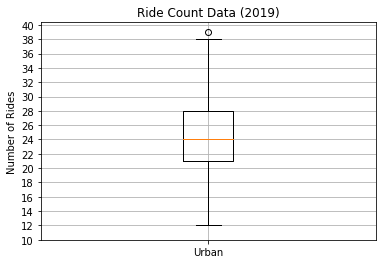

In [68]:
# Create a box-and-whisker plot for urban cities ride count.

x_labels = ['Urban']

fig, ax = plt.subplots()

ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid.

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2.0))
ax.grid()

plt.show()

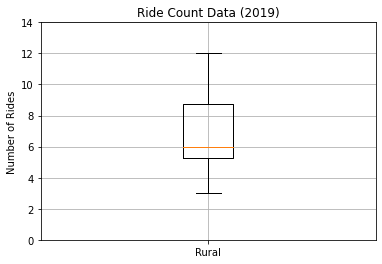

In [70]:
# Create a box-and-whisker plot for rural cities ride count.

x_labels = ['Rural']

fig, ax = plt.subplots()

ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid.

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(0,16, step=2.0))
ax.grid()

plt.show()

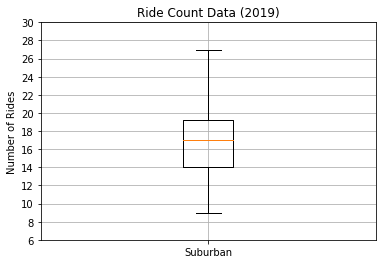

In [74]:
# Create a box-and-whisker plot for suburban cities ride count.

x_labels = ['Suburban']

fig, ax = plt.subplots()

ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, y-axis label, and grid.

ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(6,32, step=2.0))
ax.grid()

plt.show()

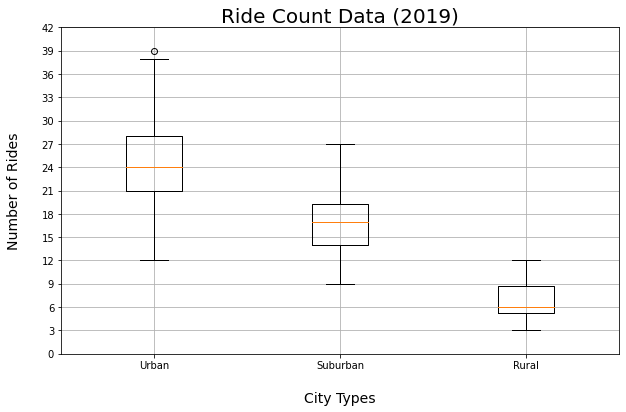

In [79]:
# Show all 3 city types data in box-and-whisker plots

x_labels = ['Urban', 'Suburban', 'Rural']

ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10,6))

# Add the title, y-axis label, and grid.

ax.set_title("Ride Count Data (2019)", fontsize=20)
ax.set_ylabel("Number of Rides\n", fontsize=14)
ax.set_xlabel("\nCity Types", fontsize=14)

ax.boxplot(ride_count_data, labels=x_labels)   # Generate plot

ax.set_yticks(np.arange(0,45, step=3.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig2.png")

plt.show()

In [82]:
# Get the outlier urban city that is equal to 39

urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]

print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


## Box-Whisker Plots for ride Fare Data

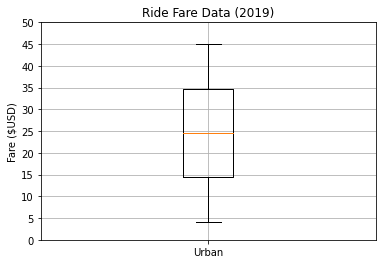

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [84]:
# Create a box-and-whisker plot for the urban fare data.

x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,51,step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_fares.describe()

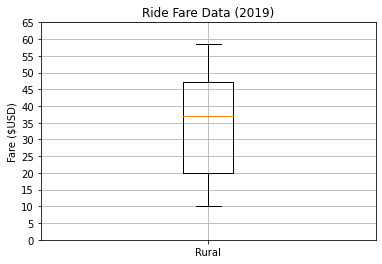

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [87]:
# Create a box-and-whisker plot for the rural fare data.

x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,66,step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_fares.describe()

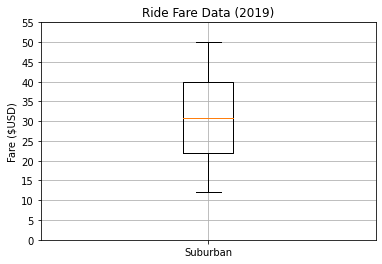

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [89]:
# Create a box-and-whisker plot for the suburban fare data.

x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.

ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0,56,step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_fares.describe()

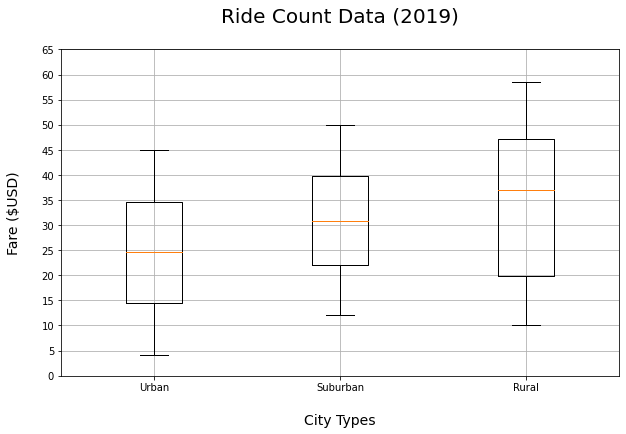

In [95]:
# Show all 3 city types data in box-and-whisker plots

x_labels = ['Urban', 'Suburban', 'Rural']

ride_fare_data = [urban_fares, suburban_fares, rural_fares]

fig, ax = plt.subplots(figsize=(10,6))

# Add the title, y-axis label, and grid.

ax.set_title("Ride Count Data (2019)\n", fontsize=20)
ax.set_ylabel("Fare ($USD)\n", fontsize=14)
ax.set_xlabel("\nCity Types", fontsize=14)

ax.boxplot(ride_fare_data, labels=x_labels)   # Generate plot

ax.set_yticks(np.arange(0,66, step=5.0))
ax.grid()

# Save the figure
plt.savefig("analysis/Fig3.png")

plt.show()

## Box-and-whisker plots for driver count data:

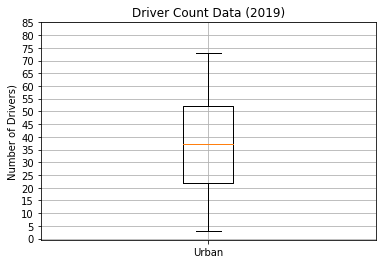

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [96]:
# Create the box-and-whisker plot for the urban driver count data.

x_labels  = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)

# Addd the title, y-axis label and grid.

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0,90,step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
urban_drivers.describe()

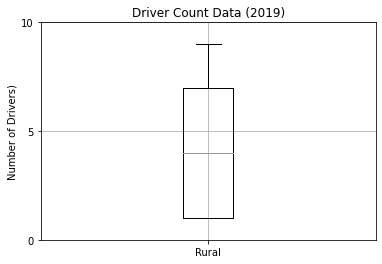

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [102]:
# Create the box-and-whisker plot for the rural driver count data.

x_labels  = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Addd the title, y-axis label and grid.

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0,11,step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
rural_drivers.describe()

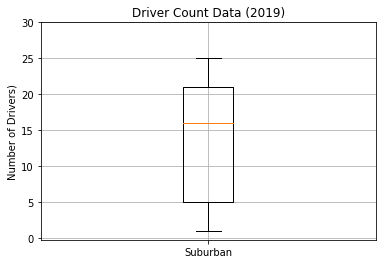

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [105]:
# Create the box-and-whisker plot for the urban driver count data.

x_labels  = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Addd the title, y-axis label and grid.

ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0,31,step=5.0))
ax.grid()
plt.show()

print("Summary Statistics")
suburban_drivers.describe()

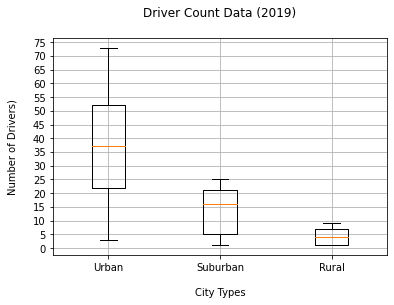

In [111]:
# Create the box-and-whisker plot for the driver count data.

x_labels  = ['Urban', 'Suburban', 'Rural']
fig, ax = plt.subplots()
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]

# Addd the title, y-axis label and grid.

ax.set_title('Driver Count Data (2019)\n')
ax.set_ylabel('Number of Drivers)\n')
ax.set_xlabel('\nCity Types')
ax.set_yticks(np.arange(0,90,step=5.0))

ax.boxplot(driver_count_data, labels=x_labels)

ax.grid()

# Save the figure
plt.savefig("analysis/Fig4.png")

plt.show()
